# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1. EDA for Insurance Premium</p>

### Problem Statement:
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health 
insurance carrier and its plans and perks while keeping the projected cost from our 
study in mind. This can assist a person in concentrating on the health side of an 
insurance policy rather han the ineffective part

### About this file

- The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.

- The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.



Dataset source link:- https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Import Data and Required Packages</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the Dataset</p>

In [2]:
df = pd.read_csv("./data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Datset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Missing Values in Dataset</p>

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- No Missing Values found in the dataset

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Duplicates in Dataset</p>

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Descriptive Statistics</p>

## Numerical and Categorical columns seperation

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


## Numerical Columns Description

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


## categorical Columns Description

In [9]:
df[categorical_features].describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


## All unique values in dataset

In [10]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50"> Exploring Data (Analysis with Visualisation)</p>

Text(0.5, 1.0, 'Age Distribution')

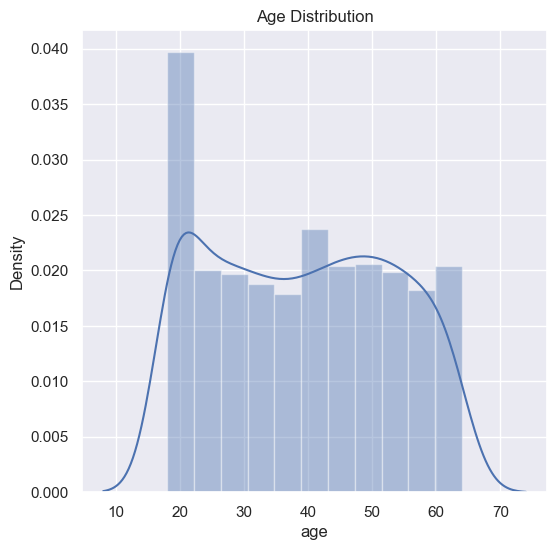

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')


Text(0.5, 1.0, 'Sex Distribution')

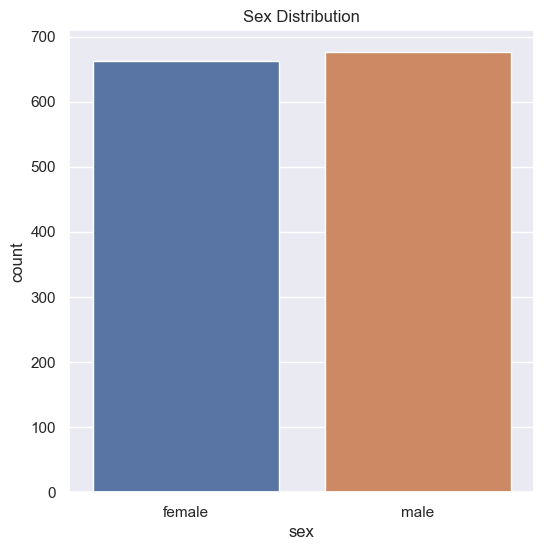

In [12]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'BMI Distribution')

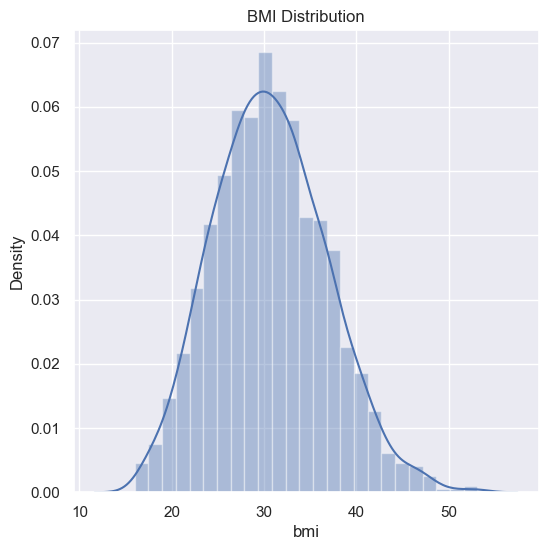

In [14]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')

Normal BMI Range --> 18.5 to 24.9

Text(0.5, 1.0, 'Children')

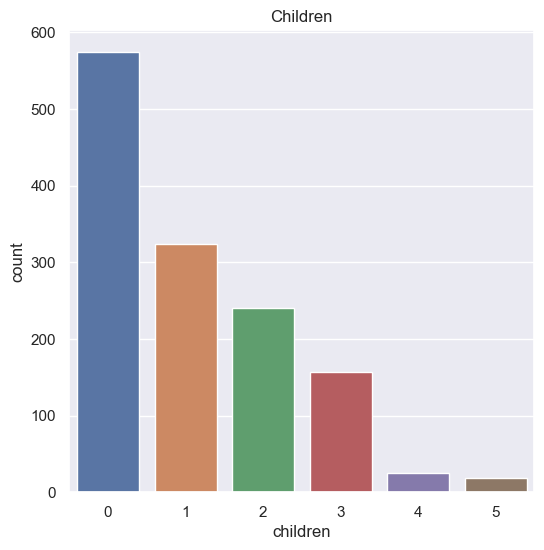

In [15]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')

In [16]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'smoker')

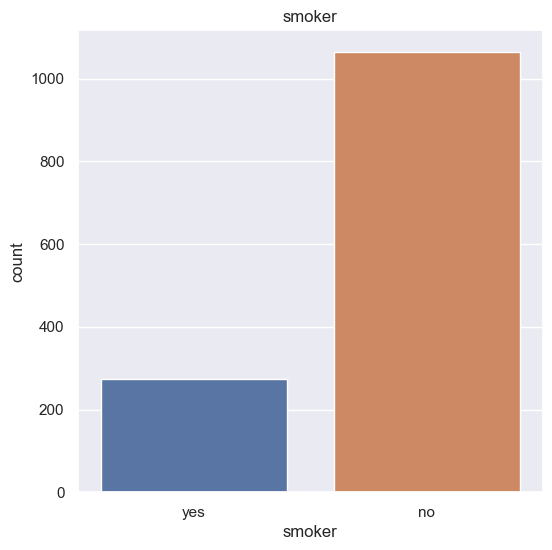

In [17]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')

In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'region')

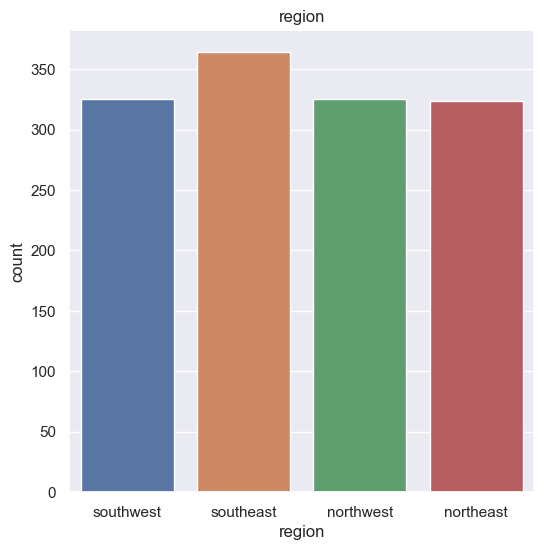

In [19]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')


 

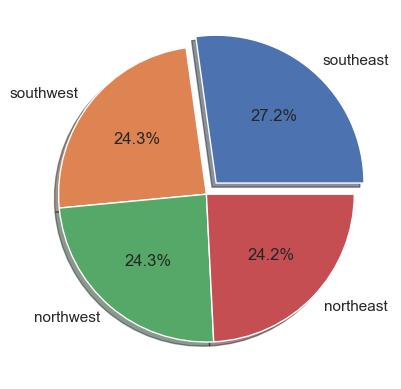

In [20]:
plt.pie(x = df['region'].value_counts(),labels=df['region'].value_counts().index,explode=[0.1,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

In [21]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Expenses Distribution')

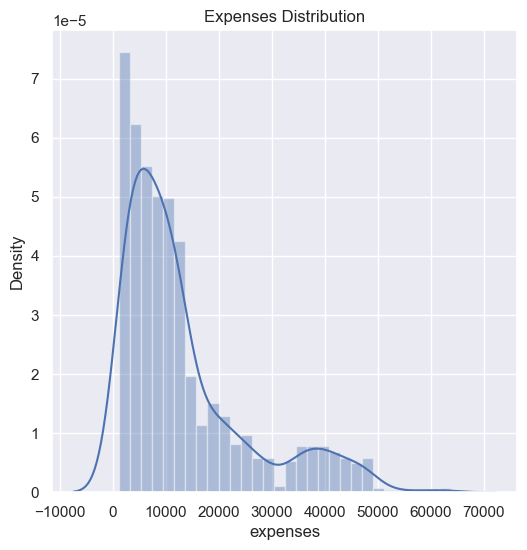

In [22]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['expenses'])
plt.title('Expenses Distribution')

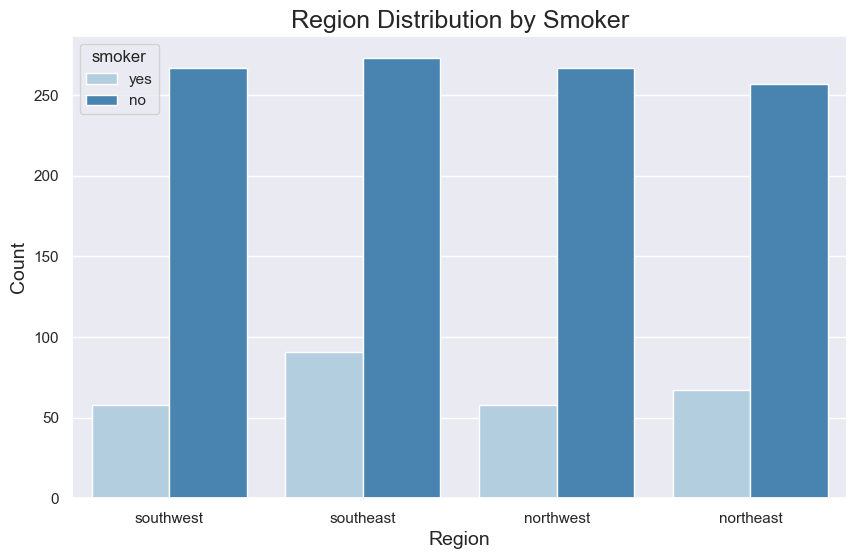

In [23]:
# Create a countplot of region with a hue for smoker
plt.figure(figsize=(10,6))
sns.countplot(x='region', data=df, hue='smoker', palette='Blues')
plt.title('Region Distribution by Smoker', size=18)
plt.xlabel('Region', size=14)
plt.ylabel('Count', size=14)
plt.show()

### BIVARIATE ANALYSIS ( Is Age type intake has any impact on Expenses ? )

<Axes: xlabel='age', ylabel='expenses'>

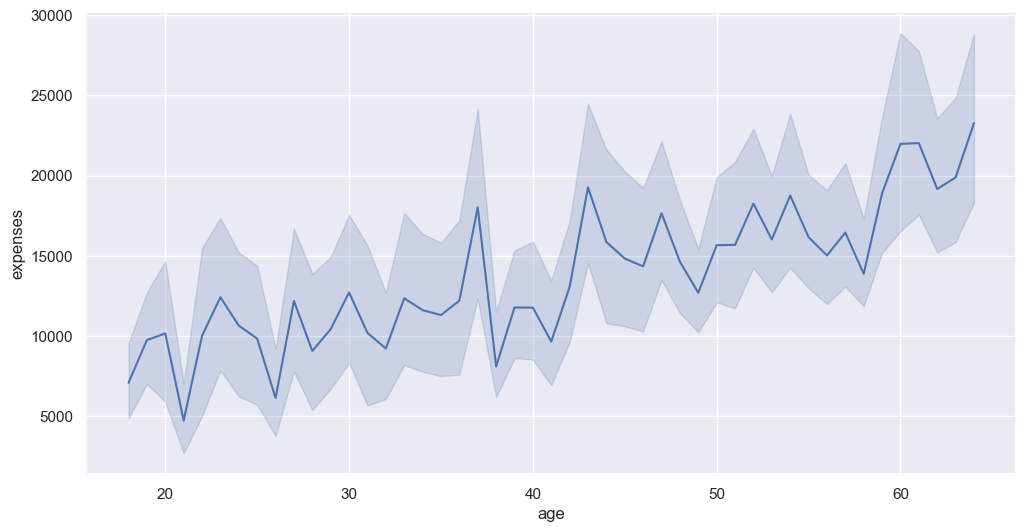

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(x='age',y='expenses',data=df)

### BIVARIATE ANALYSIS ( Is Smoking type intake has any impact on Expenses ? )

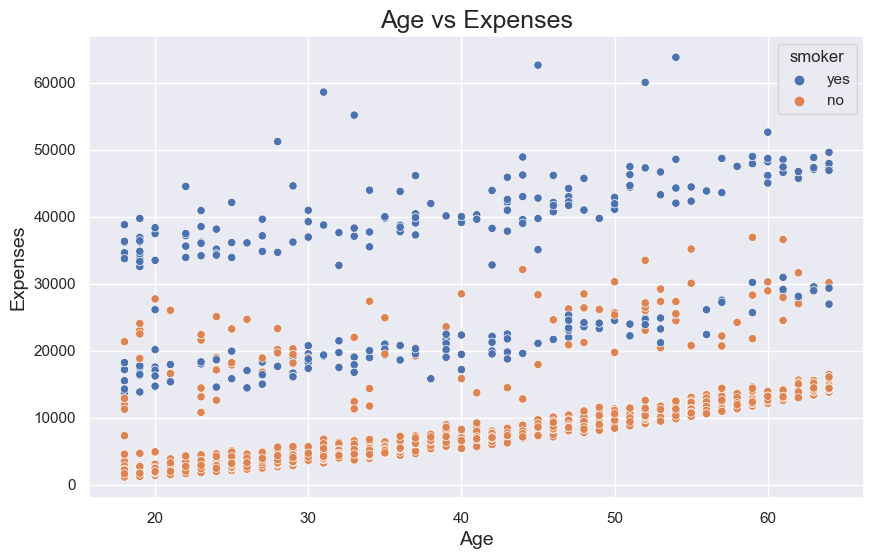

In [25]:
## Age vs Expenses
## This also shows who is a smoker or not.

plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='expenses',hue='smoker', data=df, palette='deep')
plt.title('Age vs Expenses',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Expenses',size=14)
plt.show()

<Axes: xlabel='smoker', ylabel='expenses'>

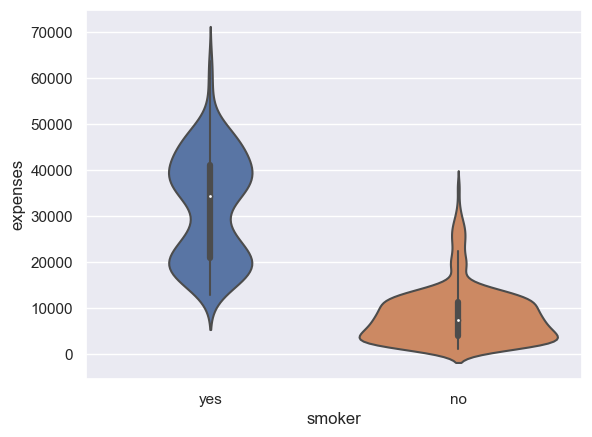

In [26]:
## Smoker Vs Expenses
sns.violinplot(data=df, x='smoker', y='expenses')

- The violinplot shows us the cost of insurance for smokers is higher than for non-smokers

<Axes: xlabel='age', ylabel='expenses'>

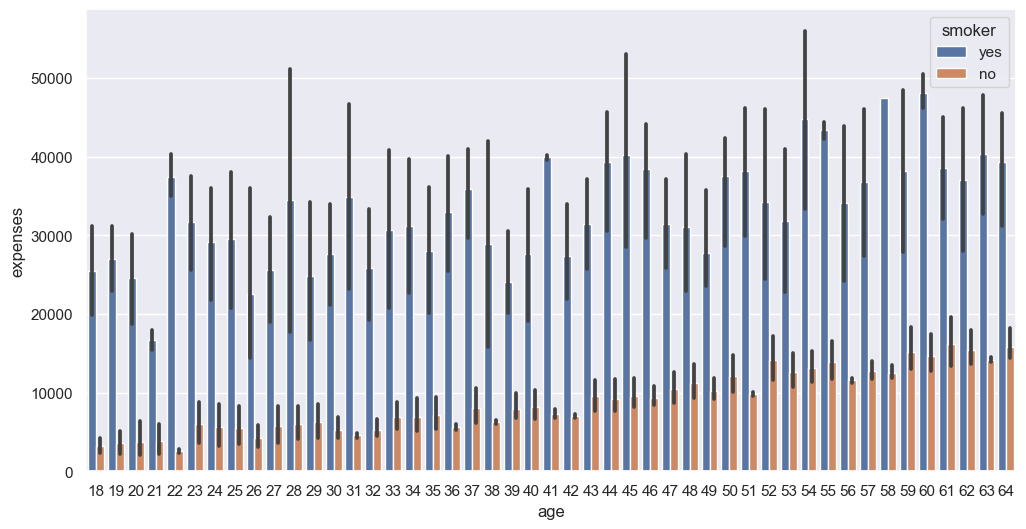

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.age,y=df.expenses,hue=df.smoker)

### Insight
- Smokers from same age group pay more expenses

### BIVARIATE ANALYSIS ( Is Region type intake has any impact on Expenses ? )

Text(0, 0.5, 'Expense')

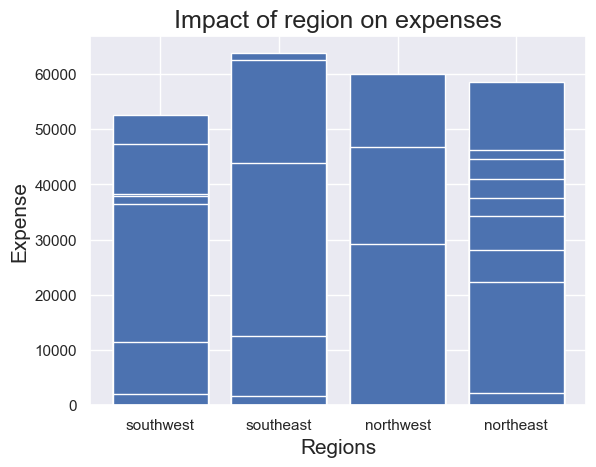

In [28]:
plt.bar(df['region'],df['expenses'])
plt.title('Impact of region on expenses',fontsize=18)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Expense', fontsize=15)


<Axes: xlabel='region', ylabel='expenses'>

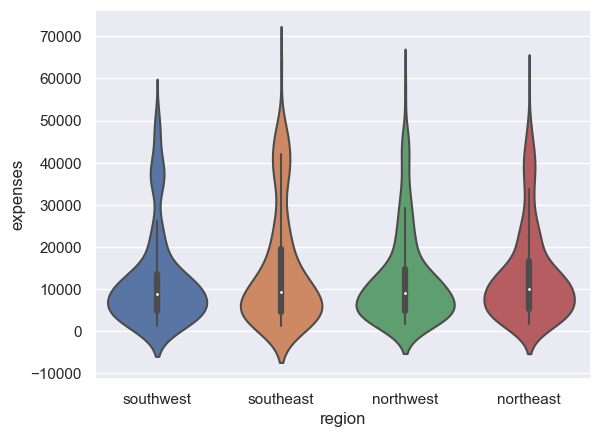

In [29]:
sns.violinplot(data=df, x='region', y='expenses')

<Axes: xlabel='age', ylabel='expenses'>

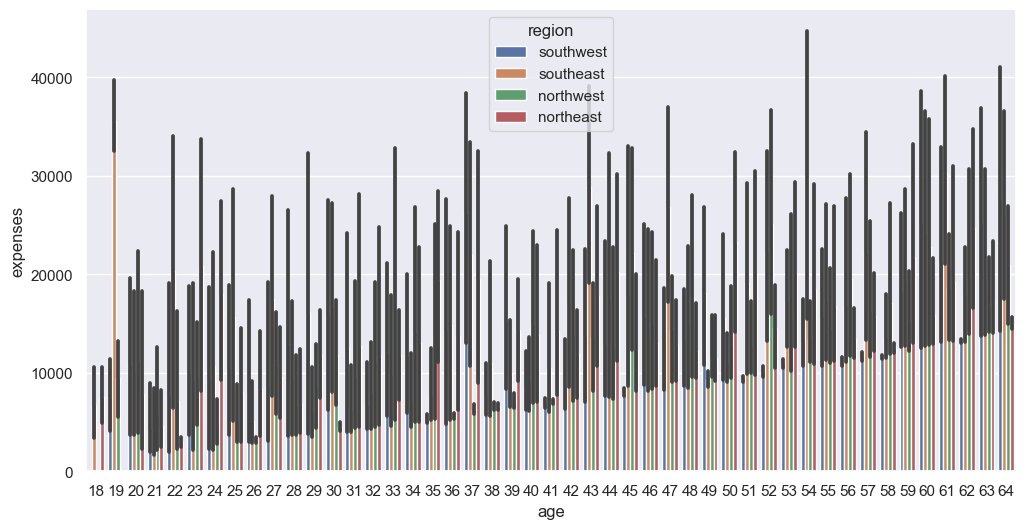

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.age,y=df.expenses,hue=df.region)

<Axes: xlabel='children', ylabel='expenses'>

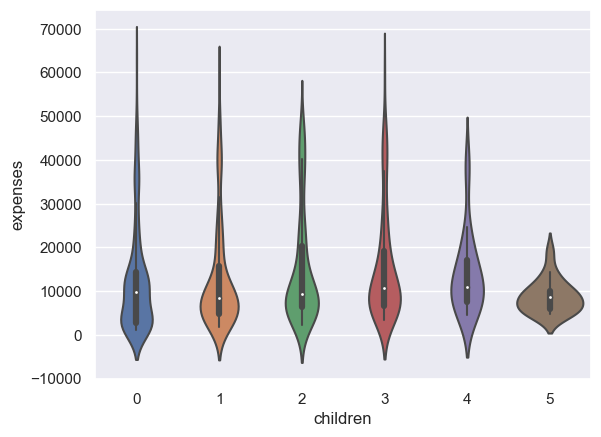

In [31]:
sns.violinplot(data=df, x='children', y='expenses')

#### Relation between Sex and Expenses

<BarContainer object of 1338 artists>

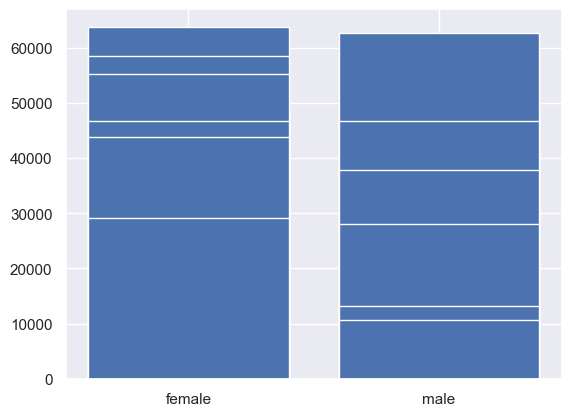

In [32]:
plt.bar(df['sex'],df['expenses'])

<Axes: xlabel='sex', ylabel='expenses'>

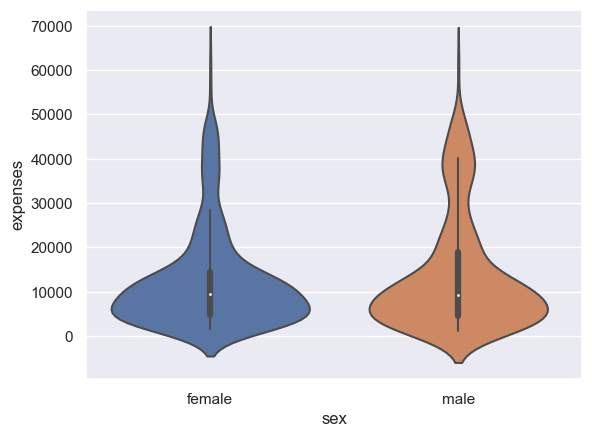

In [33]:
sns.violinplot(data=df, x='sex', y='expenses')

No Differnce on expenses between female and male

#### BMI

- A bit of feature engineering for this one, as the continous data bmi is probably understood better in categeories. according to the BMI indicators: underweight < 18, healthy 18 < 25, overweight 25 < 30, obese > 30.


In [34]:
bins = [0,18.5,25,30, 100]
slots = ['under-weight','healthy','over-weight', 'obese']

df['Bmi_range']=pd.cut(df['bmi'],bins=bins,labels=slots)
df.head()

,age,sex,bmi,children,smoker,region,expenses,Bmi_range
0,19,female,27.9,0,yes,southwest,16884.92,over-weight
1,18,male,33.8,1,no,southeast,1725.55,obese
2,28,male,33.0,3,no,southeast,4449.46,obese
3,33,male,22.7,0,no,northwest,21984.47,healthy
4,32,male,28.9,0,no,northwest,3866.86,over-weight


In [35]:
df['Bmi_range'].value_counts()

obese           698
over-weight     393
healthy         226
under-weight     21
Name: Bmi_range, dtype: int64

<Axes: xlabel='Bmi_range', ylabel='Count'>

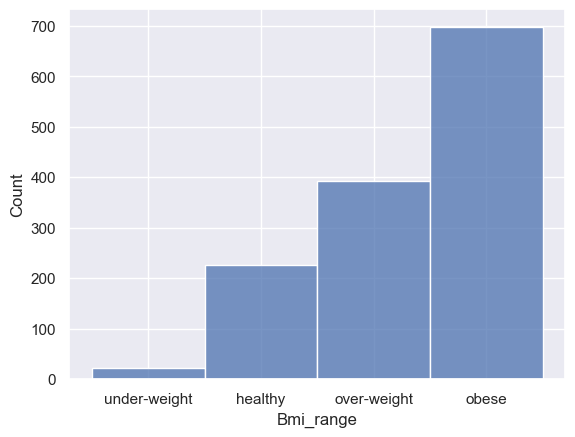

In [36]:
sns.histplot(data=df, x='Bmi_range')

In [37]:
df.groupby('Bmi_range')['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
Bmi_range,,,,,,,,
under-weight,21.0,8657.621429,7591.730224,1621.34,2775.190,6640.540,12829.460,32734.19
healthy,226.0,10435.440752,7484.434461,1121.87,4146.835,8604.150,15197.260,35069.37
over-weight,393.0,11034.944784,8129.976883,1252.41,4571.410,8703.460,15828.820,38245.59
obese,698.0,15585.776834,14593.430893,1131.51,5241.885,10003.655,19629.185,63770.43


<Axes: xlabel='Bmi_range', ylabel='expenses'>

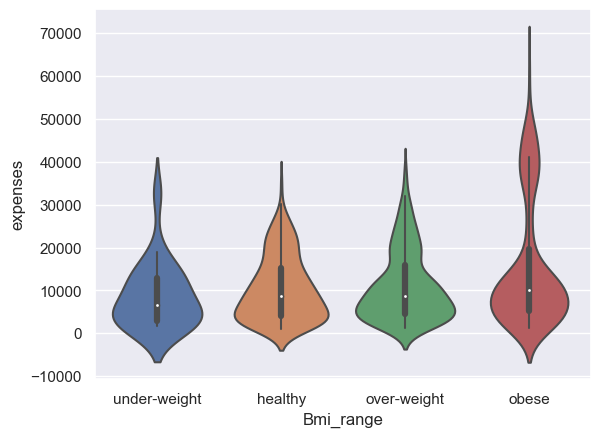

In [38]:
sns.violinplot(data=df, x='Bmi_range', y='expenses')

### BMI and smokers

In [39]:
df.groupby(['Bmi_range', 'smoker'])['expenses'].describe()

count          mean          std       min        25%  \
Bmi_range    smoker                                                          
under-weight no       16.0   5485.057500  3769.939143   1621.34   2657.030   
             yes       5.0  18809.826000  8110.515708  12829.46  14455.640   
healthy      no      176.0   7734.650284  5823.917784   1121.87   3199.995   
             yes      50.0  19942.223200  4202.478888  13747.87  16687.365   
over-weight  no      317.0   8254.217792  5950.748942   1252.41   4133.640   
             yes      76.0  22633.503421  5221.274310  15518.18  18568.375   
obese        no      555.0   8843.991387  6086.191591   1131.51   4333.715   
             yes     143.0  41751.447622  5806.871441  32548.34  37367.745   

                           50%         75%       max  
Bmi_range    smoker                                   
under-weight no       4249.325   7569.5475  13204.29  
             yes     15006.580  19023.2600  32734.19  
healthy      no       6669.480  10254.0575  30166.62  
             yes     19479.905  22133.7875  35069.37  
over-weight  no       7046.720  11085.5900  35160.13  
             yes     21410.595  25013.7875  38245.59  
obese        no       8083.920  11753.4650  36910.61  
             yes     40932.430  45706.1150  63770.43

- People who are obese and smoke on average pay double what overweight smoker, and pay 5 times more than a healthy non-smoker.

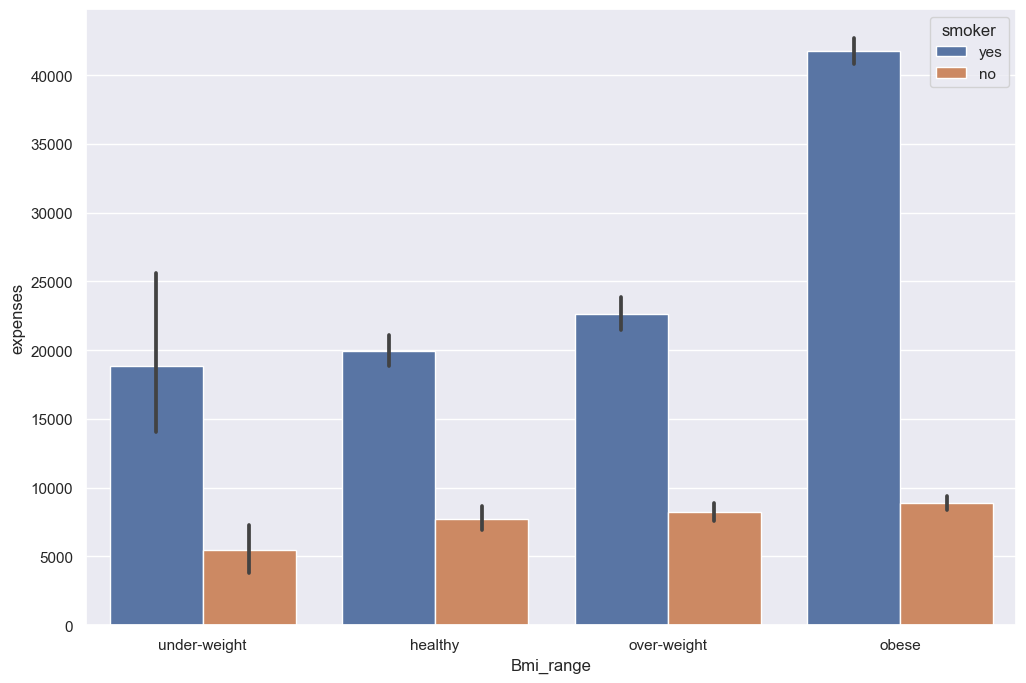

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Bmi_range', y='expenses', hue='smoker', data=df)


### BMI and Age

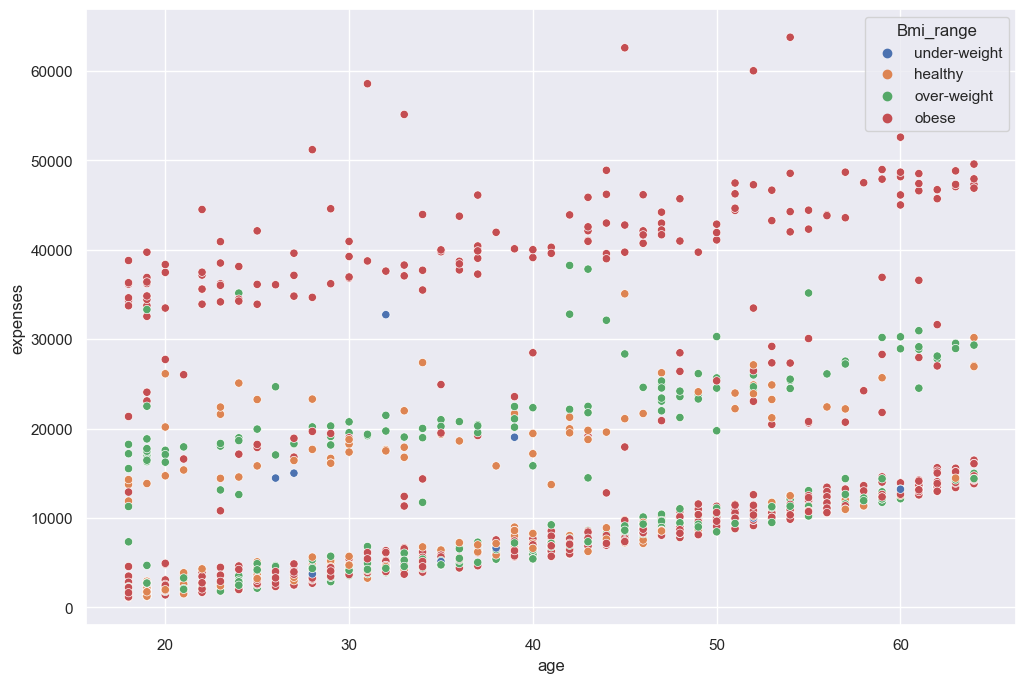

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.scatterplot(data=df, x='age', y= 'expenses', hue='Bmi_range')

BMI, smoker & age

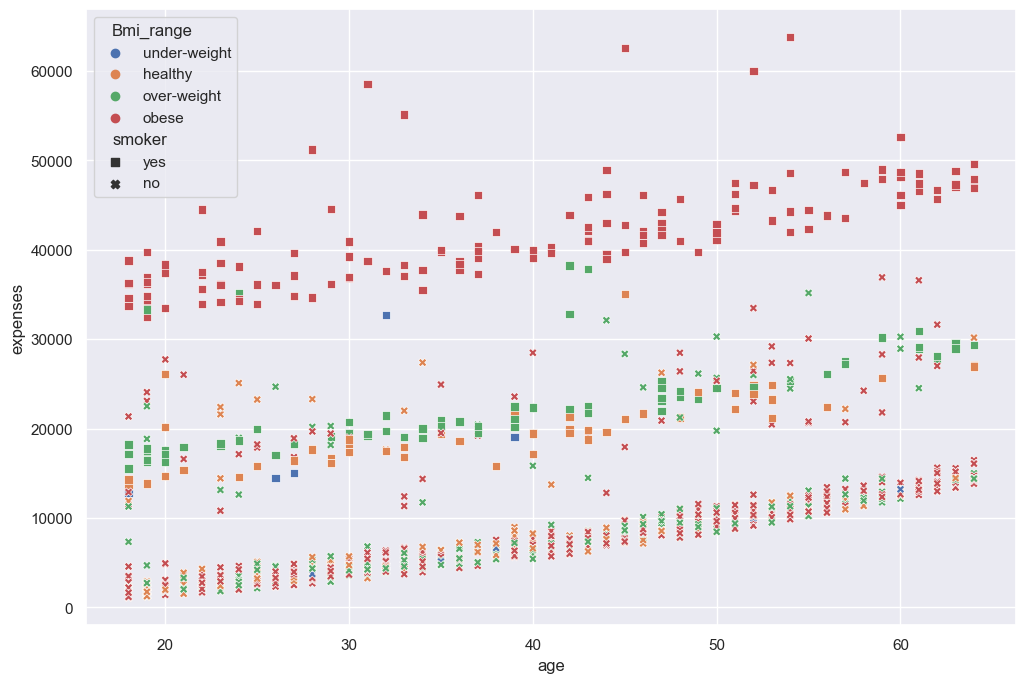

In [42]:
markers = {"yes": "s", "no": "X"}
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.scatterplot(data=df, x='age', y= 'expenses', hue='Bmi_range', style='smoker',markers=markers)

 #### MUTIVARIATE ANALYSIS USING PAIRPLOT

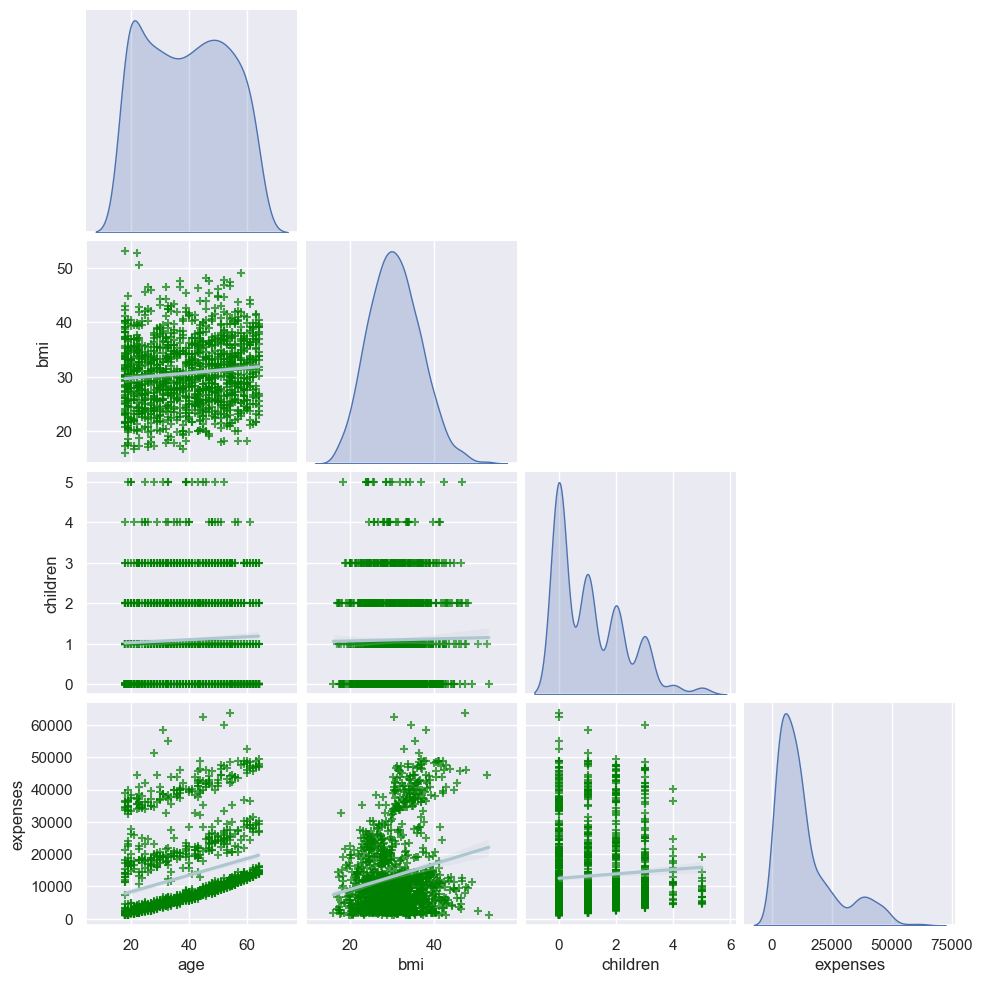

In [43]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'green'}},
                 corner=True);

#### CHECKING OUTLIERS

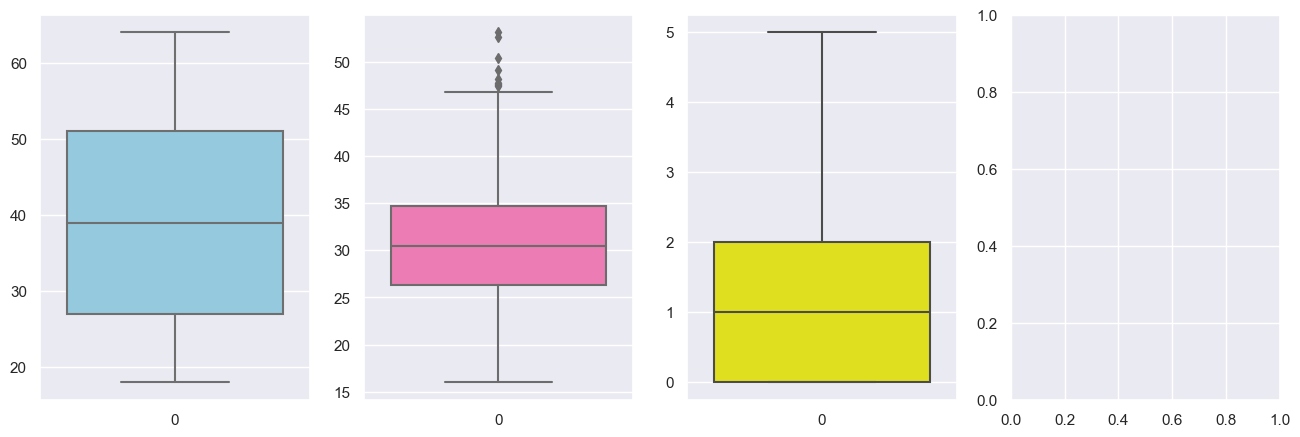

In [44]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['age'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['bmi'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['children'],color='yellow')
plt.show()

### correlation matrix

<Axes: >

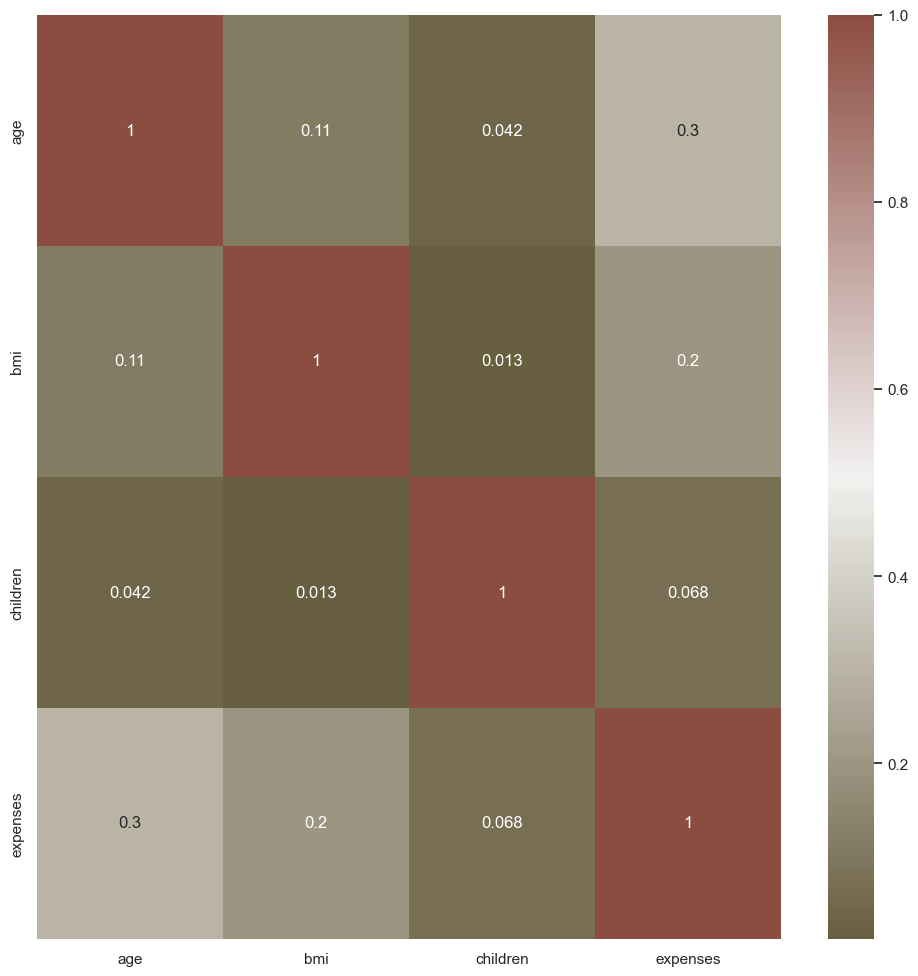

In [45]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )